# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

In [28]:
%matplotlib inline

In [29]:
from PIL import Image
import torch
import torchsummary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import copy
import numpy as np
import seaborn as sns
import os

In [30]:
! wget https://www.rewizor.ru/files/182707qdjv.jpg -O kandinsky.jpg

--2020-06-21 19:10:27--  https://www.rewizor.ru/files/182707qdjv.jpg
Resolving www.rewizor.ru (www.rewizor.ru)... 104.18.39.251, 172.67.159.25, 104.18.38.251, ...
Connecting to www.rewizor.ru (www.rewizor.ru)|104.18.39.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271699 (265K) [image/jpeg]
Saving to: ‘kandinsky.jpg’

kandinsky.jpg       100%[===================>] 265.33K  --.-KB/s    in 0.02s   

2020-06-21 19:10:27 (12.7 MB/s) - ‘kandinsky.jpg’ saved [271699/271699]



In [31]:
! wget https://artchive.ru/res/media/img/oy800/work/d5e/347499@2x.jpg -O monet.jpg

--2020-06-21 19:10:31--  https://artchive.ru/res/media/img/oy800/work/d5e/347499@2x.jpg
Resolving artchive.ru (artchive.ru)... 212.129.48.12
Connecting to artchive.ru (artchive.ru)|212.129.48.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1732801 (1.7M) [image/jpeg]
Saving to: ‘monet.jpg’

monet.jpg           100%[===================>]   1.65M  --.-KB/s    in 0.04s   

2020-06-21 19:10:31 (38.5 MB/s) - ‘monet.jpg’ saved [1732801/1732801]



In [32]:
! wget http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar -O archive.rar

--2020-06-21 19:10:35--  http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar
Resolving chaladze.com (chaladze.com)... 216.250.120.46, 2607:f1c0:1000:70f6:8ab4:44d2:262a:e822
Connecting to chaladze.com (chaladze.com)|216.250.120.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454962798 (434M) [application/rar]
Saving to: ‘archive.rar’

archive.rar         100%[===================>] 433.89M  6.38MB/s    in 65s     

2020-06-21 19:11:40 (6.65 MB/s) - ‘archive.rar’ saved [454962798/454962798]



In [33]:
get_ipython().system_raw("unrar x archive.rar")

In [34]:
! ls

 archive.rar	     checkpoint178.pth	 checkpoint29.pth
 checkpoint100.pth   checkpoint179.pth	 checkpoint2.pth
 checkpoint101.pth   checkpoint17.pth	 checkpoint30.pth
 checkpoint102.pth   checkpoint180.pth	 checkpoint31.pth
 checkpoint103.pth   checkpoint181.pth	 checkpoint32.pth
 checkpoint104.pth   checkpoint182.pth	 checkpoint33.pth
 checkpoint105.pth   checkpoint183.pth	 checkpoint34.pth
 checkpoint106.pth   checkpoint184.pth	 checkpoint35.pth
 checkpoint107.pth   checkpoint185.pth	 checkpoint36.pth
 checkpoint108.pth   checkpoint186.pth	 checkpoint37.pth
 checkpoint109.pth   checkpoint187.pth	 checkpoint38.pth
 checkpoint10.pth    checkpoint188.pth	 checkpoint39.pth
 checkpoint110.pth   checkpoint189.pth	 checkpoint3.pth
 checkpoint111.pth   checkpoint18.pth	 checkpoint40.pth
 checkpoint112.pth   checkpoint190.pth	 checkpoint41.pth
 checkpoint113.pth   checkpoint191.pth	 checkpoint42.pth
 checkpoint114.pth   checkpoint192.pth	 checkpoint43.pth
 checkpoint115.pth   checkpoint193.pth

In [35]:
image_size = 256

loader = transforms.Compose([transforms.Resize(image_size),
                             transforms.CenterCrop(image_size),
                             transforms.ToTensor()])

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    print('Training on GPU...')
else:
    print('Traning on CPU...')

Training on GPU...


In [37]:
from skimage.io import imread
 
def load_img(image_name):
    img = imread(image_name)
    image = transforms.ToPILImage()(img)
    image = loader(image)
    return image.to(device, torch.float)

In [38]:
styles = [load_img('monet.jpg'), load_img('kandinsky.jpg')]

In [39]:
data = []
for root_temp, dirs, files in os.walk(os.path.join("Linnaeus 5 256X256", 
                                                   'test',
                                                   'dog')):
    for file in files:
        data.append(load_img(os.path.join(root_temp, file)))

In [40]:
print(len(data))

400


In [41]:
print(styles[0]), styles[0].shape

tensor([[[0.3686, 0.2980, 0.2745,  ..., 0.5608, 0.6824, 0.6471],
         [0.3294, 0.2784, 0.2941,  ..., 0.5608, 0.6902, 0.6314],
         [0.2980, 0.2745, 0.3412,  ..., 0.6667, 0.6745, 0.5725],
         ...,
         [0.1765, 0.1647, 0.1608,  ..., 0.2627, 0.2471, 0.1647],
         [0.5216, 0.4824, 0.4863,  ..., 0.1922, 0.2745, 0.1608],
         [0.6078, 0.6039, 0.6588,  ..., 0.2039, 0.3216, 0.1804]],

        [[0.4000, 0.2941, 0.2510,  ..., 0.3647, 0.4863, 0.4627],
         [0.3569, 0.2941, 0.3020,  ..., 0.3137, 0.4627, 0.4275],
         [0.2980, 0.2941, 0.3608,  ..., 0.3725, 0.4353, 0.3490],
         ...,
         [0.1373, 0.0941, 0.0863,  ..., 0.2353, 0.2039, 0.1294],
         [0.3647, 0.2941, 0.3137,  ..., 0.1647, 0.2275, 0.1137],
         [0.3686, 0.3333, 0.4196,  ..., 0.1843, 0.2745, 0.1255]],

        [[0.1804, 0.1725, 0.1412,  ..., 0.2039, 0.2980, 0.2510],
         [0.1804, 0.1529, 0.1412,  ..., 0.1373, 0.2667, 0.2157],
         [0.1569, 0.1294, 0.1569,  ..., 0.1804, 0.2196, 0.

(None, torch.Size([3, 256, 256]))

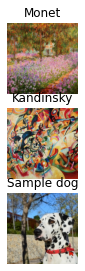

In [42]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import choice

plt.figure(figsize=(18, 6))
plt.subplot(4, 6, 1)
plt.axis("off")
plt.imshow(styles[0].transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
plt.title('Monet')

plt.subplot(4, 6, 7)
plt.axis("off")
plt.imshow(styles[1].transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
plt.title('Kandinsky')

plt.subplot(4, 6, 13)
plt.axis("off")
plt.imshow(choice(data).transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
plt.title('Sample dog')

plt.show();

In [43]:
batch_size = 5

train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

In [44]:
def make_gram_matrix(x):
    batch_size, ch, h, w = x.size()
    features = x.view(batch_size, ch, w * h)
    features_tr = features.transpose(1, 2)
    return features.bmm(features_tr) / (ch * h * w)

In [45]:
def normalize_batch(batch):
    mean = batch.new_tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
    std = batch.new_tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)
    batch = batch.div_(255.0)
    return (batch - mean) / std

In [46]:
class ConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super(ConvLayer, self).__init__()
        self.model = nn.Sequential(nn.ReflectionPad2d(kernel_size // 2),
                                   nn.Conv2d(in_channels, out_channels, kernel_size, stride))

    def forward(self, x):
        out = self.model(x)
        return out


class BatchInstanceNorm2d(nn.Module):
    def __init__(self, style_num, in_channels):
        super(BatchInstanceNorm2d, self).__init__()
        self.model = nn.ModuleList([nn.InstanceNorm2d(in_channels, affine=True) for i in range(style_num)])

    def forward(self, x, style_id):
        out = torch.stack([torch.mul(self.model[0](x[i].unsqueeze(0)).squeeze_(0), 
                                     style_id[i]).add(
                                         torch.mul(
                                             self.model[1](x[i].unsqueeze(0)).squeeze_(0), 
                                             (1 - style_id[i]))) for i in range(len(style_id))])
        return out


class Transformer(nn.Module):
    def __init__(self, num_style):
        super(Transformer, self).__init__()
        self.conv1 = ConvLayer(3, 32, 9, 1)
        self.btch1 = BatchInstanceNorm2d(num_style, 32)
        self.relu1 = nn.ReLU()
        self.conv2 = ConvLayer(32, 64, 3, 2)
        self.btch2 = BatchInstanceNorm2d(num_style, 64)
        self.relu2 = nn.ReLU()
        self.conv3 = ConvLayer(64, 128, 3, 2)
        self.btch3 = BatchInstanceNorm2d(num_style, 128)
        self.relu3 = nn.ReLU()
        self.bottleneck = nn.Sequential(*([ResidualBlock(128)] * 5))
        self.upsample3 = UpsampleConvLayer(128, 64, 3, 1, 2)
        self.btch3_2 = BatchInstanceNorm2d(num_style, 64)
        self.relu3_2 = nn.ReLU()
        self.upsample2 = UpsampleConvLayer(64, 32, 3, 1, 2)
        self.btch2_2 = BatchInstanceNorm2d(num_style, 32)
        self.relu2_2 = nn.ReLU()
        self.upsample1 = ConvLayer(32, 3, 9, 1)

    def forward(self, X, num_style):
        y0 = self.btch1(self.conv1(X), num_style)
        y1 = self.relu1(y0)
        y2 = self.relu2(self.btch2(self.conv2(y1), num_style))
        y3 = self.relu3(self.btch3(self.conv3(y2), num_style))
        y_b = self.bottleneck(y3)
        y4 = self.relu3_2(self.btch3_2(self.upsample3(y_b), num_style))
        y5 = self.relu2_2(self.btch2_2(self.upsample2(y4), num_style))
        y6 = self.upsample1(y5)

        return y6


class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.model = nn.Sequential(ConvLayer(channels, channels, 3, 1),
                                   nn.InstanceNorm2d(channels, affine=True),
                                   nn.ReLU(),
                                   ConvLayer(channels, channels, 3, 1),
                                   nn.InstanceNorm2d(channels, affine=True))
        self.relu = nn.ReLU()

    def forward(self, x):
        residual = x
        out = self.model(x)
        out += residual
        return self.relu(out)


class UpsampleConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, upsample=None):
        super(UpsampleConvLayer, self).__init__()
        self.upsample = upsample
        reflection_padding = kernel_size // 2
        self.model = nn.Sequential(nn.ReflectionPad2d(kernel_size // 2),
                                   nn.Conv2d(in_channels, out_channels, kernel_size, stride))
        if self.upsample:
            self.upsample_layer = nn.Upsample(mode='nearest', scale_factor=upsample)

    def forward(self, x):
        x_w = x
        if self.upsample:
            x_w = self.upsample_layer(x_w)
        out = self.model(x_w)
        return out

In [47]:
from collections import namedtuple


class Discriminator(nn.Module):
    def __init__(self, requires_grad=False):
        super(Discriminator, self).__init__()
        vgg_pretrained_features = models.vgg16(pretrained=True).features
        self.slice1 = torch.nn.Sequential()
        self.slice2 = torch.nn.Sequential()
        self.slice3 = torch.nn.Sequential()
        self.slice4 = torch.nn.Sequential()
        for x in range(4):
            self.slice1.add_module(str(x), vgg_pretrained_features[x])
        for x in range(4, 9):
            self.slice2.add_module(str(x), vgg_pretrained_features[x])
        for x in range(9, 16):
            self.slice3.add_module(str(x), vgg_pretrained_features[x])
        for x in range(16, 23):
            self.slice4.add_module(str(x), vgg_pretrained_features[x])
        if not requires_grad:
            for param in self.parameters():
                param.requires_grad = False

    def forward(self, X):
        h = self.slice1(X)
        h_relu1_2 = h
        h = self.slice2(h)
        h_relu2_2 = h
        h = self.slice3(h)
        h_relu3_3 = h
        h = self.slice4(h)
        h_relu4_3 = h
        vgg_outputs = namedtuple("VggOutputs", ['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'])
        out = vgg_outputs(h_relu1_2, h_relu2_2, h_relu3_3, h_relu4_3)
        return out

In [48]:
transform_train = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                      transforms.ToTensor()])


In [49]:
def apply(func, M):
    tList = [func(m) for m in torch.unbind(M, dim=0) ]
    res = torch.stack(tList, dim=0)
    return res 

In [50]:
epochs = 250
content_weight = 1
style_weight = 100000
log_interval = 10
lr = 0.001

style_num = len(styles)
print(style_num)

np.random.seed(42)
torch.manual_seed(42)

transformer = Transformer(style_num).to(device)
optimizer = optim.Adam(transformer.parameters(), lr=lr, eps=1e-1)

2


In [51]:
import time

transform = loader

mse_loss = nn.MSELoss()

scheduler = optim.lr_scheduler.StepLR(optimizer, 50)

vgg = Discriminator(requires_grad=False).to(device)
style_transform = loader

style = torch.stack(styles).to(device)

features_style = vgg(normalize_batch(style))
gram_style = [make_gram_matrix(y) for y in features_style]


st_loss, con_loss, total_loss = [], [], []


for e in range(epochs):
    clear_output(wait=True)
    transformer.train()
    agg_content_loss = 0.
    agg_style_loss = 0.
    count = 0
    st_loss_ep, con_loss_ep, total_loss_ep = [], [], []
    for batch_id, x in enumerate(train_loader):
        x = apply(transform_train, x.cpu()).to(device)
        n_batch = len(x)
        
        if n_batch < batch_size:
            break # skip to next epoch when no enough images left in the last batch of current epoch

        count += n_batch
        optimizer.zero_grad() # initialize with zero gradients

        batch_style_id = [i % style_num for i in range(count-n_batch, count)]
        y = transformer(x.to(device), num_style=batch_style_id)

        y = normalize_batch(y)
        x = normalize_batch(x)

        features_y = vgg(y.to(device))
        features_x = vgg(x.to(device))
        content_loss = content_weight * mse_loss(features_y.relu2_2, features_x.relu2_2)
        con_loss_ep.append(content_loss)
        style_loss = 0.
        for ft_y, gm_s in zip(features_y, gram_style):
            gm_y = make_gram_matrix(ft_y)
            style_loss += mse_loss(gm_y, gm_s[batch_style_id, :, :])
        style_loss *= style_weight
        st_loss_ep.append(style_loss)

        total_loss_b = content_loss + style_loss
        total_loss_ep.append(total_loss_b)
        total_loss_b.backward()
        optimizer.step()
        if (batch_id + 1) % log_interval == 0:
                mesg = "{}\tEpoch {}:\t[{}/{}]\tcontent: {:.6f}\tstyle: {:.6f}\ttotal: {:.6f}".format(
                    time.ctime(), e + 1, count, len(data),
                                  con_loss_ep[-1],
                                  st_loss_ep[-1],
                                  total_loss_ep[-1]
                )
                print(mesg)
    scheduler.step()
    st_loss.append(sum(st_loss_ep) / len(st_loss_ep))
    con_loss.append(sum(con_loss_ep) / len(con_loss_ep))
    total_loss.append(sum(total_loss_ep) / len(total_loss_ep))
    plt.plot(st_loss, label='Style loss')
    plt.plot(con_loss, label='Content loss')
    plt.plot(total_loss, label='Total loss')
    plt.legend(loc='best')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("NST Loss Progression")
    plt.show()
    dog = choice(data)
    with torch.no_grad():
        predict = transformer(dog.unsqueeze(0).to(device), num_style=[0.5])
        plt.axis("off")
        plt.imshow(predict.squeeze(0).transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
        plt.title('Sample dog')
        plt.show()
    torch.save(transformer.state_dict(), f'checkpoint{e + 1}.pth')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files

torch.save(transformer.state_dict(), 'checkpoint.pth')

# download checkpoint file
files.download('checkpoint.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


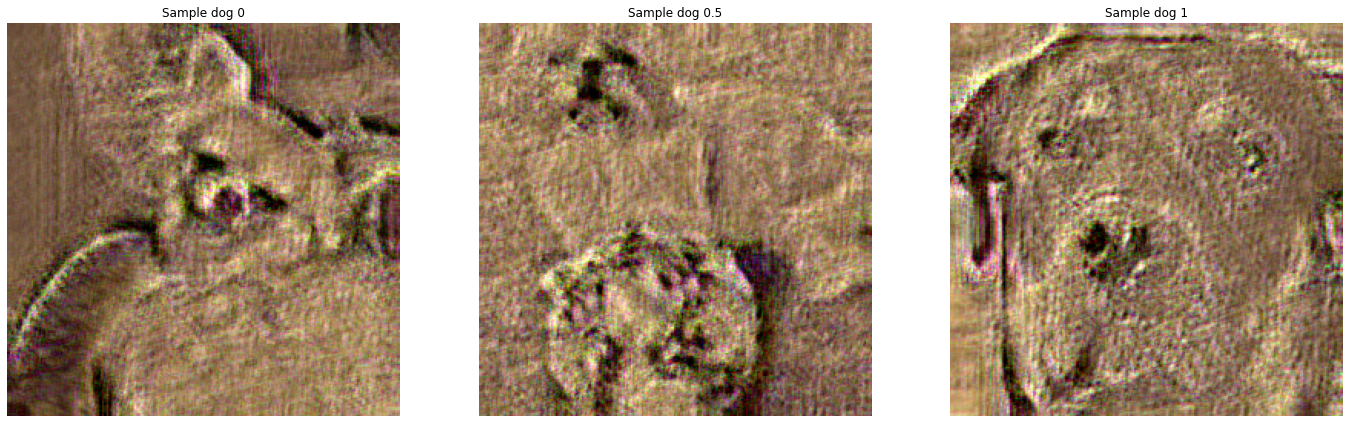

In [56]:
pic0 = choice(data)
pic1 = choice(data)
pic2 = choice(data)
with torch.no_grad():
    predict1 = transformer(pic0.unsqueeze(0).to(device), num_style=[0])
    predict2 = transformer(pic1.unsqueeze(0).to(device), num_style=[0.5])
    predict3 = transformer(pic2.unsqueeze(0).to(device), num_style=[1])
plt.figure(figsize=(100, 200))
plt.subplot(12, 12, 1)
plt.imshow(predict1.squeeze(0).transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
plt.axis("off")
plt.title('Sample dog 0')
plt.subplot(12, 12, 2)
plt.imshow(predict2.squeeze(0).transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
plt.axis("off")
plt.title('Sample dog 0.5')
plt.subplot(12, 12, 3)
plt.imshow(predict3.squeeze(0).transpose(0, 1).transpose(1, 2).squeeze(0).cpu())
plt.axis("off")
plt.title('Sample dog 1')
plt.show()